In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from cycler import cycler
import popoff
import pop_off_functions as pof
import pop_off_plotting as pop
from Session import SessionLite
from linear_model import PoolAcrossSessions, LinearModel, MultiSessionModel
from utils.utils_funcs import d_prime
from tqdm import tqdm
import svgutils.compose as sc
import IPython.display as ip

/home/loidolt/RowlandEtAl/popping-off/popoff/popoff/loadpaths.py
/home/loidolt/RowlandEtAl/Vape


In [58]:
import seaborn as sns

In [56]:
pas = PoolAcrossSessions(remove_targets=False, subsample_sessions=False,
                         remove_toosoon=True, pre_start=-8)
    

long post time
long post time
long post time
long post time
long post time
Mouse RL070, run 29  registered no-lick hit. changed to too soon
long post time
long post time
Mouse RL117, run 29  registered no-lick hit. changed to too soon
Mouse RL117, run 29  registered no-lick hit. changed to too soon
long post time
long post time
long post time
Mouse RL116, run 32  registered no-lick hit. changed to too soon
Mouse RL116, run 32  registered no-lick hit. changed to too soon
Mouse RL116, run 32  registered no-lick hit. changed to too soon
long post time
ALERT SESSIONS NOT SUBSAMPLED
long post time
long post time
long post time
long post time
long post time
long post time
long post time
long post time
long post time
long post time
long post time


In [59]:
color_tt = {'hit': '#117733', 'miss': '#882255', 'fp': '#88CCEE', 'cr': '#DDCC77',
            'Hit': '#117733', 'Miss': '#882255', 'FP': '#88CCEE', 'CR': '#DDCC77',
            'urh': '#44AA99', 'arm': '#AA4499', 'spont': '#332288', 'prereward': '#332288', 
            'reward\nonly': '#332288', 'Reward\nonly': '#332288',
            'pre_reward': '#332288', 'Reward': '#332288', 'reward only': '#332288', 'rew. only': '#332288', 'hit&miss': 'k', 
            'fp&cr': 'k', 'photostim': sns.color_palette()[6], 'too_': 'grey',
            'hit_n1': '#b0eac9', 'hit_n2': '#5ab17f', 'hit_n3': '#117733',
            'miss_n1': '#a69098', 'miss_n2': '#985d76', 'miss_n3': '#882255',
            'hit_c1': '#b0eac9', 'hit_c2': '#5ab17f', 'hit_c3': '#117733',
            'miss_c1': '#a69098', 'miss_c2': '#985d76', 'miss_c3': '#882255'
            } 

In [60]:
pas.linear_models[0].session.n_neurons

477

In [62]:
pas.linear_models[0].flu.shape

(471, 162, 420)

In [184]:
F = pas.linear_models[4].flu
F_rebinned = np.sum(F.reshape((F.shape[0], F.shape[1], F.shape[2]//3, 3)), axis=-1)

In [218]:
def ML_PrePost_dFF_plot(F_rebinned, neuron_idx, trial_idx, color,
                        F_min=-1, F_max=1,
                        stim_min=int(8*10-3), stim_max=int(8*10+10*0.75), 
                        ana_min=int(8*10-7*10), ana_max=int(8*10-0.5*10),
                        earliest_ana_start=int(3*10),
                        figsize=(2,1.4)):
    
    n_bins = int(F_rebinned.shape[2])
    
    fig, ax = plt.subplots(figsize=figsize, dpi=300)
    
    pre_F_rebinned = F_rebinned[neuron_idx][trial_idx][:,:,:stim_min]
    pre_X = np.arange(0, stim_min)
    pre_F_mean = np.mean(pre_F_rebinned, axis=(0,1))
    pre_F_std = np.std(np.mean(pre_F_rebinned, axis=0), axis=0)
    
    post_F_rebinned = F_rebinned[neuron_idx][trial_idx][:,:,stim_max:]
    post_X = np.arange(stim_max, n_bins)
    post_F_mean = np.mean(post_F_rebinned, axis=(0,1))
    post_F_std = np.std(np.mean(post_F_rebinned, axis=0), axis=0)
    
    ana_X = np.arange(ana_min, ana_max)
    ana_F_mean = np.mean(F_rebinned[neuron_idx][trial_idx][:,:,ana_min:ana_max])
    
    ax.plot(pre_X, pre_F_mean, color=color)
    ax.plot(post_X, post_F_mean, color=color)
    
    ax.fill_between(pre_X, pre_F_mean - pre_F_std, pre_F_mean+pre_F_std, alpha=0.4, color=color)
    ax.fill_between(post_X, post_F_mean - post_F_std, post_F_mean+post_F_std, alpha=0.4, color=color)
    
    ax.axvspan(xmin=stim_min+1, xmax=stim_max-2, alpha=1, color=color_tt['photostim'])
    
    ax.set_ylabel(r"$\Delta F/F$")
    ax.set_xlabel("time [s]")
    
    ax.set_xticks([8*10-5*10, 8*10, 8*10+5*10])
    ax.set_xticklabels([-5, 0, +5])
    ax.set_xlim(0,n_bins)
    
    ax.set_ylim(F_min, F_max)
    
    ax.fill_between(ana_X, pre_F_mean[ana_min:ana_max]+pre_F_std[ana_min:ana_max], F_max, alpha=0.3, color='grey')
    ax.fill_between(ana_X, F_min, pre_F_mean[ana_min:ana_max]-pre_F_std[ana_min:ana_max], alpha=0.3, color='grey')
    
    ax.axhline(ana_F_mean, color='k', linestyle=':')
    
    ax.axvline(ana_min, color='k', linestyle='-')
    ax.axvline(ana_max, color='k', linestyle='-')
    
    ax.axvline(earliest_ana_start, color='k', linestyle='--')

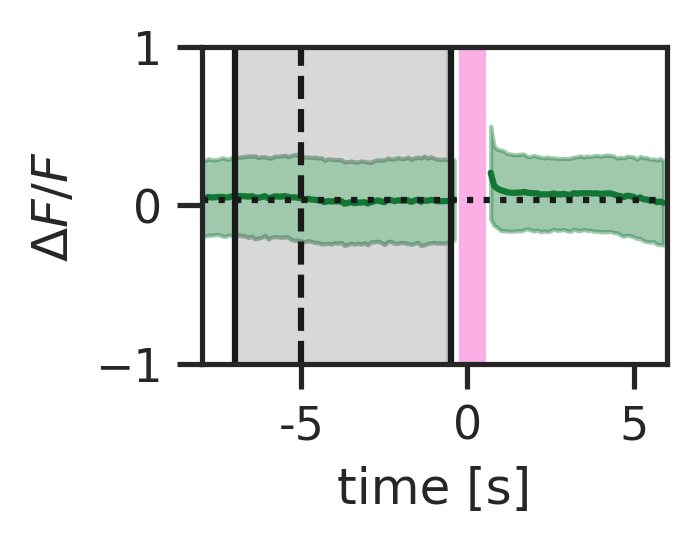

In [219]:
ML_PrePost_dFF_plot(F_rebinned, s1_idx, hit_idx, color=color_tt['hit'])


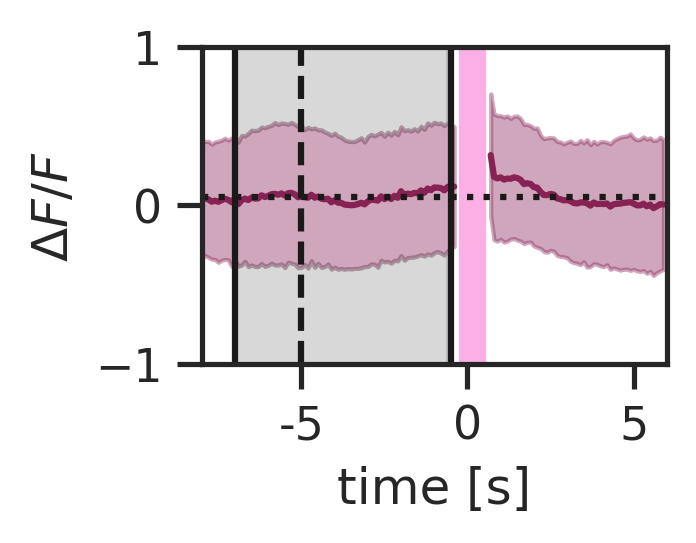

In [220]:
ML_PrePost_dFF_plot(F_rebinned, s1_idx, miss_idx, color=color_tt['miss'])
